## Notebook Example

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as data
from sklearn.metrics import classification_report
# Our package
from rude import Ensemble, evaluate_num_estimators
from rude.utils import balanced_train_test_split

In [3]:
def plot(datasets):
    
    NAMES = ['True distribution','Training set','Test set']
    
    fig, ax = plt.subplots(1,3,figsize =(15,5))
    
    for i, data in enumerate(datasets):
        x,y = data
        ax[i].scatter(x[:,0],x[:,1],c=y,alpha = 0.5)
        ax[i].grid(True)
        ax[i].set_facecolor("lightgray")
        ax[i].set_title(NAMES[i])

    plt.show()

## I. Sklearn Case Studies.

In [4]:
num_samples = 1500
noise = 0.1

### 1. Moon data

#### a) Balanced Data

In [5]:
x, y = data.make_moons(n_samples=num_samples, noise=noise)
x_train, y_train, x_test, y_test = balanced_train_test_split(x, y, size=200)
datasets = [(x,y),(x_train, y_train),(x_test, y_test)]

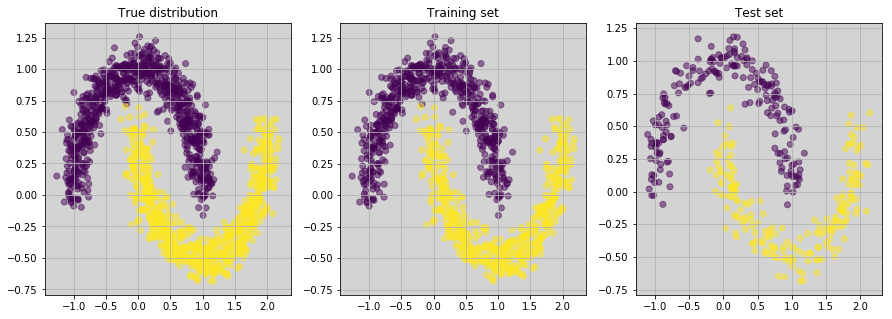

In [6]:
plot(datasets)

In [7]:
M = evaluate_num_estimators(y_train)

In [8]:
ensemble = Ensemble(num_estimators = M)
ensemble.fit(x_train,y_train)
print(classification_report(y_test,ensemble.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00       200
          1       1.00      1.00      1.00       200

avg / total       1.00      1.00      1.00       400



#### b) Unbalanced Data

In [9]:
percent = 0.05 # Percentage of observations of class 0 kept for the analysis
indtrain = np.where(y_train == 0)[0]
indtrain = np.random.choice(indtrain,replace=False,size = int(len(indtrain)*percent))
indtrain = np.concatenate([indtrain,np.where(y_train == 1)[0]])

In [10]:
x_train_u = x_train[indtrain]
y_train_u = y_train[indtrain]

In [11]:
datasets = [(x,y),(x_train_u, y_train_u),(x_test, y_test)]

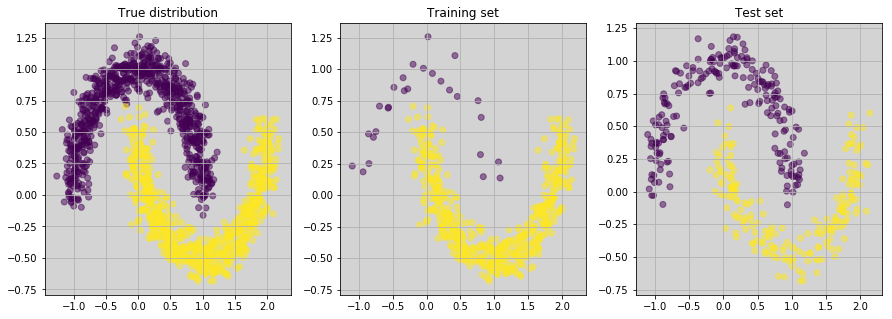

In [12]:
plot(datasets)

In [13]:
M = evaluate_num_estimators(y_train_u)

In [14]:
ensemble = Ensemble(num_estimators = M)
ensemble.fit(x_train_u,y_train_u)
print(classification_report(y_test,ensemble.predict(x_test)))

             precision    recall  f1-score   support

          0       0.95      0.92      0.93       200
          1       0.92      0.95      0.94       200

avg / total       0.94      0.94      0.93       400



### 2. Circle data

#### a) Balanced Data

In [15]:
x, y = data.make_circles(n_samples=num_samples, factor=.5, noise=noise)
x_train, y_train, x_test, y_test = balanced_train_test_split(x, y, size=200)
datasets = [(x,y),(x_train, y_train),(x_test, y_test)]

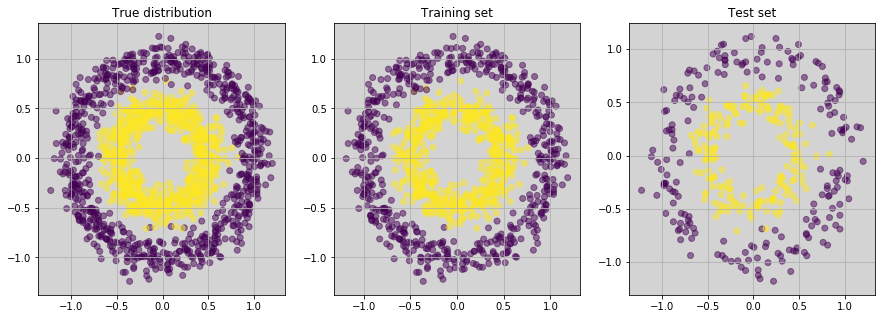

In [16]:
plot(datasets)

In [17]:
M = evaluate_num_estimators(y_train)

In [18]:
ensemble = Ensemble(num_estimators = M)
ensemble.fit(x_train,y_train)
print(classification_report(y_test,ensemble.predict(x_test)))

             precision    recall  f1-score   support

          0       0.98      0.95      0.97       200
          1       0.95      0.98      0.97       200

avg / total       0.97      0.97      0.97       400



#### b) Unbalanced Data

In [19]:
percent = 0.05 # Percentage of observations of class 0 kept for the analysis
indtrain = np.where(y_train == 0)[0]
indtrain = np.random.choice(indtrain,replace=False,size = int(len(indtrain)*percent))
indtrain = np.concatenate([indtrain,np.where(y_train == 1)[0]])

In [20]:
x_train_u = x_train[indtrain]
y_train_u = y_train[indtrain]

In [21]:
datasets = [(x,y),(x_train_u, y_train_u),(x_test, y_test)]

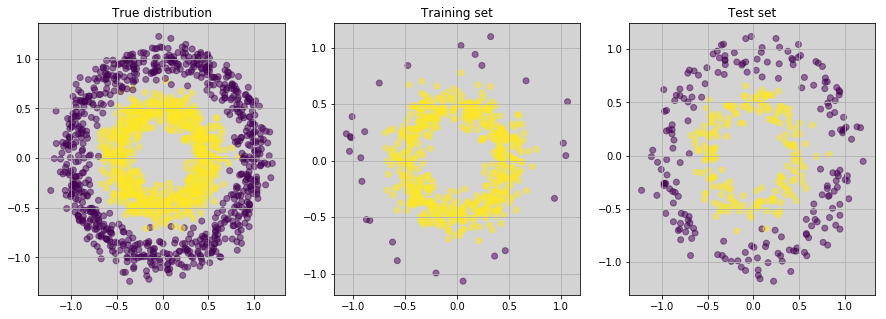

In [22]:
plot(datasets)

In [23]:
M = evaluate_num_estimators(y_train_u)

In [24]:
ensemble = Ensemble(num_estimators = M)
ensemble.fit(x_train_u,y_train_u)
print(classification_report(y_test,ensemble.predict(x_test)))

             precision    recall  f1-score   support

          0       0.94      0.95      0.95       200
          1       0.95      0.94      0.94       200

avg / total       0.95      0.94      0.94       400

